# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(training_data, batch_size=32, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I composed tensors and normalized mean and standart deviation with the value 0.5.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

Train:
0


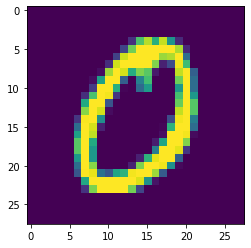

1


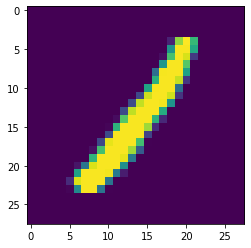

6


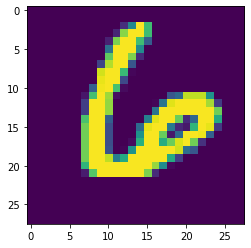

8


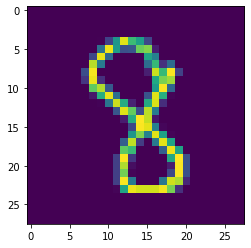

9


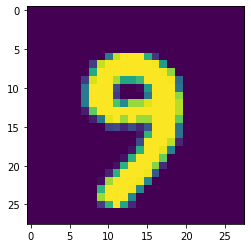

Test:
7


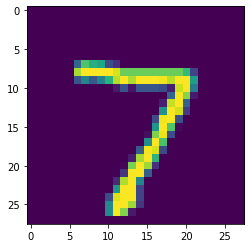

2


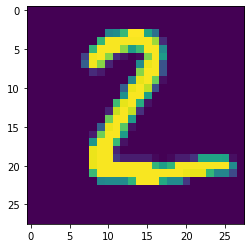

1


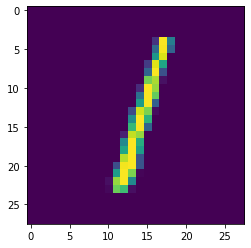

0


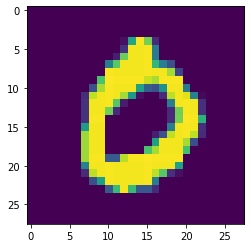

4


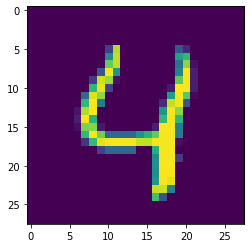

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()
print("Train:")
show5(train_loader)
print("Test:")
show5(test_loader)

In [4]:
# Explore data
exploration_train = iter(train_loader)
inputs, labels = exploration_train.next()

print(inputs.shape)
print(labels.shape)


torch.Size([32, 1, 28, 28])
torch.Size([32])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
first_layer = nn.Linear(28 * 28 * 1, 128)
second_layer = nn.Linear(128, 64)
third_layer = nn.Linear(64, 10)

model = nn.Sequential(first_layer,
                      nn.ReLU(),
                      second_layer,
                      nn.ReLU(),
                      third_layer,
                      nn.LogSoftmax(dim=1))




Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.7)

criterion = nn.NLLLoss()

inputs = inputs.view(inputs.shape[0], -1)
logps = model(inputs) 
loss = criterion(logps, labels) 




## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [7]:
num_epochs = 13

train_loss_history = list()

for epoch in range(num_epochs):
    train_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs = inputs.view(inputs.shape[0], -1)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

Epoch 1 training loss: 0.74058
Epoch 2 training loss: 0.31556
Epoch 3 training loss: 0.26092
Epoch 4 training loss: 0.22162
Epoch 5 training loss: 0.19164
Epoch 6 training loss: 0.16770
Epoch 7 training loss: 0.14850
Epoch 8 training loss: 0.13418
Epoch 9 training loss: 0.12127
Epoch 10 training loss: 0.11040
Epoch 11 training loss: 0.10089
Epoch 12 training loss: 0.09311
Epoch 13 training loss: 0.08673


Plot the training loss (and validation loss/accuracy, if recorded).

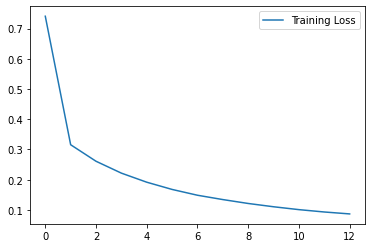

In [8]:
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [9]:
for epoch in range(num_epochs):
    test_loss = 0.0
    test_correct = 0
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.shape[0], -1)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        for i in range(len(labels)):
            img = inputs[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        test_correct += (true_label == pred_label).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {(test_correct/len(test_loader)) * 100:.2f}% testing loss: {test_loss/len(test_loader):.5f}')


Epoch 1 test accuracy: 98.72% testing loss: 0.10047
Epoch 2 test accuracy: 98.72% testing loss: 0.08794
Epoch 3 test accuracy: 98.72% testing loss: 0.07902
Epoch 4 test accuracy: 99.04% testing loss: 0.07205
Epoch 5 test accuracy: 99.04% testing loss: 0.06608
Epoch 6 test accuracy: 99.04% testing loss: 0.06108
Epoch 7 test accuracy: 99.36% testing loss: 0.05660
Epoch 8 test accuracy: 99.36% testing loss: 0.05281
Epoch 9 test accuracy: 99.36% testing loss: 0.04923
Epoch 10 test accuracy: 99.36% testing loss: 0.04611
Epoch 11 test accuracy: 99.36% testing loss: 0.04313
Epoch 12 test accuracy: 99.36% testing loss: 0.04048
Epoch 13 test accuracy: 99.36% testing loss: 0.03807


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [10]:
first_layer = nn.Linear(28 * 28 * 1, 128)
second_layer = nn.Linear(128, 64)
third_layer = nn.Linear(64, 10)

model = nn.Sequential(first_layer,
                      nn.ReLU(),
                      second_layer,
                      nn.ReLU(),
                      third_layer,
                      nn.LogSoftmax(dim=1))

optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.09)



num_epochs = 13


for epoch in range(num_epochs):
    train_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs = inputs.view(inputs.shape[0], -1)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training loss: {train_loss/len(train_loader):.5f}')

for epoch in range(num_epochs):
    test_loss = 0.0
    test_correct = 0
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.shape[0], -1)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        for i in range(len(labels)):
            img = inputs[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        test_correct += (true_label == pred_label).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {(test_correct/len(test_loader)) * 100:.2f}% testing loss: {test_loss/len(test_loader):.5f}')

Epoch 1 training loss: 1.58691
Epoch 2 training loss: 0.57267
Epoch 3 training loss: 0.41328
Epoch 4 training loss: 0.36327
Epoch 5 training loss: 0.33682
Epoch 6 training loss: 0.31850
Epoch 7 training loss: 0.30432
Epoch 8 training loss: 0.29241
Epoch 9 training loss: 0.28199
Epoch 10 training loss: 0.27260
Epoch 11 training loss: 0.26360
Epoch 12 training loss: 0.25510
Epoch 13 training loss: 0.24652
Epoch 1 test accuracy: 94.89% testing loss: 0.23853
Epoch 2 test accuracy: 94.57% testing loss: 0.23206
Epoch 3 test accuracy: 94.89% testing loss: 0.22712
Epoch 4 test accuracy: 94.89% testing loss: 0.22296
Epoch 5 test accuracy: 95.21% testing loss: 0.21925
Epoch 6 test accuracy: 95.21% testing loss: 0.21588
Epoch 7 test accuracy: 95.21% testing loss: 0.21275
Epoch 8 test accuracy: 95.21% testing loss: 0.20977
Epoch 9 test accuracy: 95.21% testing loss: 0.20695
Epoch 10 test accuracy: 95.53% testing loss: 0.20422
Epoch 11 test accuracy: 95.85% testing loss: 0.20161
Epoch 12 test accur

## Saving your model
Using `torch.save`, save your model for future loading.

In [11]:
torch.save(model, './MNIST_Model_Optimized.pt') 